<a href="https://colab.research.google.com/github/AimjGuytidy/pytorch-on/blob/main/lazy_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import torch
 import torch.nn as nn
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt

## Regression with pytorch

In [2]:
# specify the sample size
N = 20
# create synthetic variable
X = np.random.random(N) * 10 - 5
# create target variable related to X
Y = 0.5*X - 1 + np.random.randn(N)

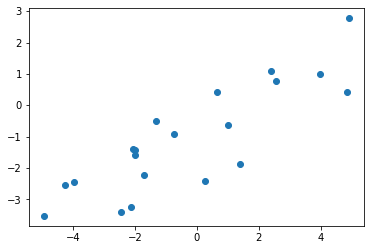

In [3]:
# let's visualize our data
plt.scatter(X,Y)

In [4]:
#create a model object
model = nn.Linear(1,1)
#create loss and optimizer objects
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)
#reshape and convert variables into tensors
X = X.reshape(N,1)
Y = Y.reshape(N,1)
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))


In [5]:
type(inputs)

torch.Tensor

In [6]:
# Train the model
n_epochs = 30
losses = []
for i in range(n_epochs):
  # initialize the gradient parameters to zeros
  optimizer.zero_grad()
  #find the losses of the model
  outputs = model(inputs)
  loss = criterion(outputs,targets)
  #keep the losses
  losses.append(loss.item())
  #backward and optimize the parameters
  loss.backward()
  optimizer.step()
  print(f"Epoch: {i+1}/{n_epochs}, Loss: {loss:.4f}")

Epoch: 1/30, Loss: 12.7512
Epoch: 2/30, Loss: 9.2337
Epoch: 3/30, Loss: 6.7765
Epoch: 4/30, Loss: 5.0591
Epoch: 5/30, Loss: 3.8576
Epoch: 6/30, Loss: 3.0161
Epoch: 7/30, Loss: 2.4258
Epoch: 8/30, Loss: 2.0109
Epoch: 9/30, Loss: 1.7184
Epoch: 10/30, Loss: 1.5113
Epoch: 11/30, Loss: 1.3640
Epoch: 12/30, Loss: 1.2585
Epoch: 13/30, Loss: 1.1822
Epoch: 14/30, Loss: 1.1265
Epoch: 15/30, Loss: 1.0851
Epoch: 16/30, Loss: 1.0538
Epoch: 17/30, Loss: 1.0298
Epoch: 18/30, Loss: 1.0108
Epoch: 19/30, Loss: 0.9954
Epoch: 20/30, Loss: 0.9827
Epoch: 21/30, Loss: 0.9718
Epoch: 22/30, Loss: 0.9624
Epoch: 23/30, Loss: 0.9540
Epoch: 24/30, Loss: 0.9465
Epoch: 25/30, Loss: 0.9395
Epoch: 26/30, Loss: 0.9331
Epoch: 27/30, Loss: 0.9271
Epoch: 28/30, Loss: 0.9214
Epoch: 29/30, Loss: 0.9160
Epoch: 30/30, Loss: 0.9109


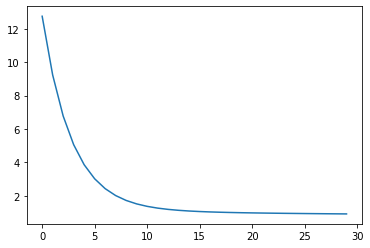

In [7]:
plt.plot(losses)

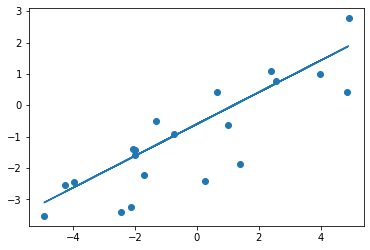

In [8]:
predicted = model(inputs).detach().numpy()
plt.scatter(X,Y,label="Real values")
plt.plot(X,predicted,label="Predicted values")

In [9]:
# get predictions without using detach
with torch.no_grad():
  out = model(inputs).numpy()
out

array([[-1.6131655 ],
       [-1.6456933 ],
       [-1.2671573 ],
       [ 1.8853854 ],
       [ 0.6211126 ],
       [-0.09247887],
       [-2.7655349 ],
       [-1.8348953 ],
       [ 1.4109591 ],
       [-1.6136254 ],
       [ 0.7011486 ],
       [-0.46342805],
       [-0.27454513],
       [-1.4569771 ],
       [-3.0991836 ],
       [-1.6743828 ],
       [ 1.8567847 ],
       [ 0.1155771 ],
       [-0.9779047 ],
       [-2.610651  ]], dtype=float32)

In [10]:
# Let's check if the parameters of the model are close to the real parameters
w = model.weight.data.numpy()
b = model.bias.data.numpy()
(w,b)

(array([[0.50783473]], dtype=float32), array([-0.5987543], dtype=float32))

## Moore's Law Regression

In [12]:
# get the data
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-02-25 23:37:33--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-02-25 23:37:33 (48.3 MB/s) - ‘moore.csv’ saved [2302/2302]



In [14]:
data = pd.read_csv("moore.csv",header=None).values

In [15]:
data.shape

(162, 2)

In [16]:
X = data[:,0].reshape(-1,1)
Y = data[:,1].reshape(-1,1)

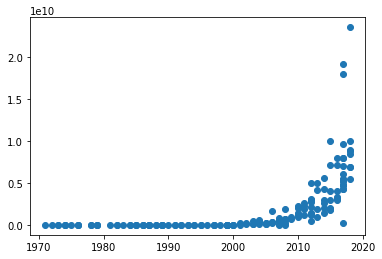

In [17]:
plt.scatter(X,Y)

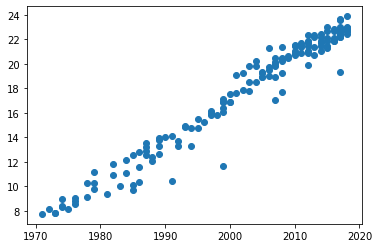

In [25]:
# let's transform our data
Y = np.log(Y)
plt.scatter(X,Y)

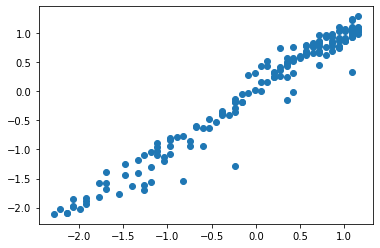

In [26]:
# Normalizing data values
xmean = X.mean()
xsd = X.std()
ymean = Y.mean()
ysd = Y.std()
# normalize and standardize our data
x = (X-xmean)/xsd
y = (Y-ymean)/ysd
#let's visualize the changes made
plt.scatter(x,y)

In [28]:
# turn data into tensors
inputs = torch.from_numpy(x.astype(np.float32))
targets = torch.from_numpy(y.astype(np.float32))

In [30]:
# create model object
model = nn.Linear(1,1)
#create loss and optimizer objects
criterion = nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01,momentum = 0.7)


In [31]:
n_epochs = 120
losses = []
for i in range(n_epochs):
  # initialize the optimizers parameters
  optimizer.zero_grad()
  # calculate losses and outputs
  outputs = model(inputs)
  loss = criterion(outputs,targets)
  losses.append(loss.item())
  # backward and optimization
  loss.backward()
  optimizer.step()
  print(f"Epoch:{i+1}/{n_epochs}, Loss:{loss.item():.4f}")


Epoch:1/120, Loss:4.3917
Epoch:2/120, Loss:4.2193
Epoch:3/120, Loss:3.9376
Epoch:4/120, Loss:3.5956
Epoch:5/120, Loss:3.2295
Epoch:6/120, Loss:2.8636
Epoch:7/120, Loss:2.5138
Epoch:8/120, Loss:2.1894
Epoch:9/120, Loss:1.8951
Epoch:10/120, Loss:1.6324
Epoch:11/120, Loss:1.4009
Epoch:12/120, Loss:1.1988
Epoch:13/120, Loss:1.0237
Epoch:14/120, Loss:0.8730
Epoch:15/120, Loss:0.7439
Epoch:16/120, Loss:0.6338
Epoch:17/120, Loss:0.5402
Epoch:18/120, Loss:0.4608
Epoch:19/120, Loss:0.3937
Epoch:20/120, Loss:0.3369
Epoch:21/120, Loss:0.2891
Epoch:22/120, Loss:0.2488
Epoch:23/120, Loss:0.2149
Epoch:24/120, Loss:0.1864
Epoch:25/120, Loss:0.1625
Epoch:26/120, Loss:0.1424
Epoch:27/120, Loss:0.1256
Epoch:28/120, Loss:0.1114
Epoch:29/120, Loss:0.0996
Epoch:30/120, Loss:0.0897
Epoch:31/120, Loss:0.0813
Epoch:32/120, Loss:0.0744
Epoch:33/120, Loss:0.0685
Epoch:34/120, Loss:0.0636
Epoch:35/120, Loss:0.0595
Epoch:36/120, Loss:0.0561
Epoch:37/120, Loss:0.0532
Epoch:38/120, Loss:0.0508
Epoch:39/120, Loss:0.

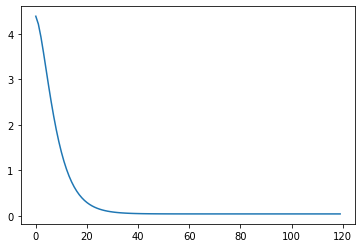

In [32]:
# let's visualize the losses journey!
plt.plot(losses)

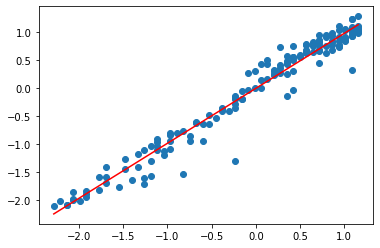

In [34]:
# let's visualize the fitted line to transformed data
predicted = model(inputs).detach().numpy()
plt.scatter(x,y,label="Real Transformed Data")
plt.plot(x,predicted,color="red",label="Fitted line by the model")

In [36]:
# let's look at the slope parameter of our model
w = model.weight.data.numpy()
print(w)

[[0.9805094]]
